In [65]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import colors
import aplpy
import astropy.wcs as wcs


In [2]:
### load constants and functions
# Image information and assumptions
distance        = 8340. # distance to GC; Reid et al. 2014
#Temp            = 20.0
Wave            = (3.0e8/(226e9))
Wave0           = 1.3e-3
k0              = 0.899
nu              = 3.e08/Wave
nu0             = 3.e08/Wave0
beta            = 1.75
Kappag2d        = k0*((nu/nu0)**beta)
g2d             = 100.0
Kappa           = Kappag2d / g2d
mu              = 2.8 # express everything in H2

dustTemp = 20

# Constants
G = 6.67408e-11
msun = 1.989e33
mh = 1.6737236e-27
pc2cm = 3.08567758e18
as2persr = 4.25e10 
percm2perm = 1.0e6
JyperSr_to_JyperPix = (3.0462*(10**-4))*((0.00013888888888)**2) ### 
JyperSr_to_Jyperassqr = ((np.pi*180.)**(-2))*(3600**(-1))
hplanck = 6.63e-34
clight = 2.99792e8
kboltzmann = 1.381e-23
sin1yr = 3.15569e7
arcsec2pc = distance/((360./(2.*np.pi))*60.*60.)

In [3]:
def planck_wave( Wave, Temp ):

    # Planck function using wavelength

    planck_conv_wave = 1.e-26 * clight / Wave**2.0

    planck = ((2.0*hplanck*clight**2.0)/(Wave**5.0))*(1.0/(np.exp((hplanck*clight)/(Wave*kboltzmann*Temp))-1.0))
    planck = planck/planck_conv_wave

    return planck

def mass_calc_submm( Wave, Temp, Kappa, Integrated_Flux, Obj_Dist ):

    Obj_Dist = Obj_Dist * pc2cm
    #from planck_func import planck_wave
    B = planck_wave( Wave, Temp )
    Mass = (Obj_Dist**2. * Integrated_Flux) / ( Kappa * B )
    Mass = Mass / msun
    return Mass

In [218]:
### flux to mass for point source for simulated observation source recovery tests
### FOR JY/BEAM POINT SOURCES
### OR JY/PIX POINT SOURCES
point_flux = 0.15 ### jy/beam
#BMAJ    =   9.391762150659E-04                                                  
#BMIN    =   8.101911677255E-04
BMAJ    =   9.207714266247E-04                                                  
BMIN    =   6.383301814397E-04 
deg2_per_beam = np.pi*BMAJ*BMIN
deg2_per_pix = (1.388888888889E-04)**2

#flux_integrated = point_flux*(deg2_per_pix/deg2_per_beam)
#print flux_integrated
#mass = mass_calc_submm(Wave,dustTemp,Kappa,flux_integrated,distance)

point_flux_jy_per_pix = point_flux * (deg2_per_pix/deg2_per_beam)
print point_flux_jy_per_pix
point_flux_jy_per_pix = 0.05
mass = mass_calc_submm(Wave,50,Kappa,point_flux_jy_per_pix,distance)

print mass

0.00156703674605
27.36849660071255


In [9]:
### NOISE CONVERSION FROM CATALOG VALUE TO SIMOBS VALUE
BMAJ    =   9.207714266247E-04                                                  
BMIN    =   6.383301814397E-04 
deg2_per_beam = np.pi*BMAJ*BMIN
deg2_per_pix = (1.388888888889E-04)**2
#print deg2_per_beam/deg2_per_pix
deg2_per_sr = 3282.8
noise_jy_per_sr = 4.0e6
noise_jy_per_beam = noise_jy_per_sr*(deg2_per_beam/deg2_per_sr)
noise_jy_per_pix = noise_jy_per_sr*(deg2_per_pix/deg2_per_sr)
print noise_jy_per_pix
print noise_jy_per_beam

2.35044760044e-05
0.00224989708094


[130.13610413 125.80366175 121.47120311 117.13876073 112.80631835
 108.47385971 104.14141733  99.80897495  95.47651631  91.14407393
  86.81163155  82.47917291  78.14673053  73.81428815  69.48182951
  65.14938713  60.81694475  56.48448611  52.15204373  47.81960135
  43.48714271  39.15470033  34.82225795  30.48979931  26.15735693
  21.82491455  17.49245591  13.16001353   8.82757115   4.49511251
   0.16267013]


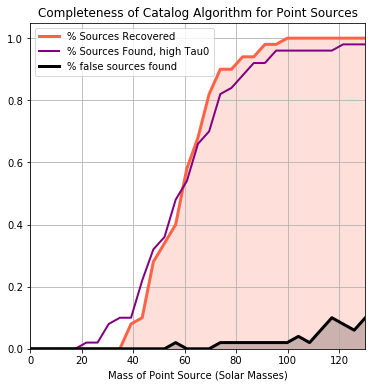

In [215]:
### Plot for mass vs percent found
### also average runs together
BMAJ    =   9.391762150659E-04
BMIN    =   8.101911677255E-04 
deg2_per_beam = np.pi*BMAJ*BMIN
deg2_per_pix = (1.388888888889E-04)**2

found_avg = np.array([1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    0.98,  0.98,  0.94,  0.94,
                      0.9,   0.9,   0.82,  0.68,  0.58,  0.4,   0.34,  0.28,  0.1,   0.08,  0.,    0.,    0.,
                      0.,    0.,    0.,    0.,    0.,    0.  ])

hightau_avg = np.array([0.98,  0.98,  0.98,  0.96,  0.96,  0.96,  0.96,  0.96,  0.96,  0.92,  0.92,  0.88,
                        0.84,  0.82,  0.7,   0.66,  0.54,  0.48,  0.36,  0.32,  0.22,  0.1,   0.1,   0.08,
                        0.02,  0.02,  0.,    0.,    0.,    0.,    0.])

point_fluxes = np.array([0.08,        0.07733667,  0.07467333,  0.07201,     0.06934667,  0.06668333,
                         0.06402,     0.06135667,  0.05869333,  0.05603,     0.05336667,  0.05070333,
                         0.04804,     0.04537667,  0.04271333,  0.04005,     0.03738667,  0.03472333,
                         0.03206,     0.02939667,  0.02673333,  0.02407,     0.02140667,  0.01874333,
                         0.01608,     0.01341667,  0.01075333,  0.00809,     0.00542667,  0.00276333,
                         0.0001    ])
#fp_avg = np.array([1.4,  1.4,  1.4,  1.2,  0.8,  1.,   2.,   1.2,  0.8,  0.6,  0.2,  0.2,  0.2,  0.2,  0.,
#                     0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
#                     0. ])
fp_avg = np.array([ 1.,   0.6, 0.8,  1.,   0.6,  0.2,  0.4,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.,
                    0.,   0.,   0.2 , 0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                    0. ])
fp_avg = fp_avg/10.
#integrated_fluxes = point_fluxes*(deg2_per_pix/deg2_per_beam)
integrated_fluxes = point_fluxes
masses = mass_calc_submm(Wave,dustTemp,Kappa,integrated_fluxes,distance)
print masses

plt.close()
mrfig = plt.figure(3,figsize=(6,6))
mrfig.clf()
ax = mrfig.gca()
ax.plot(masses, found_avg,ls='-',color='tomato',linewidth='3.0', label='% Sources Recovered')
ax.plot(masses, hightau_avg,ls='-',color='purple',linewidth='2.0', label ='% Sources Found, high Tau0' )
ax.plot(masses, fp_avg,ls='-',color='k',linewidth='3.0',label='% false sources found')
plt.xlabel('Mass of Point Source (Solar Masses)')
#plt.ylabel('Percent Sources Found')
plt.title('Completeness of Catalog Algorithm for Point Sources')
ax.set_ylim(0,1.05)
ax.set_xlim(0,130.)
ax.grid()
fill = ax.fill_between(masses,found_avg, color='tomato',alpha=0.2,edgecolor='red',linewidth = '0.0')
fill = ax.fill_between(masses,fp_avg, color='k',alpha=0.2,edgecolor='k',linewidth = '0.0')
plt.legend()
mrfig.savefig(path+'simobs_percent.pdf',format='pdf')
plt.show()


In [207]:
### aplpy figures for simobs frames
def make_simobs_panel(path,inputfits1,inputfits2,maskfits,label):
    plt.close()
    fg_color='white'
    bg_color='black'
    contour_hdu = fits.open(path+maskfits)[0]
    data_hdu = fits.open(path+inputfits1)[0]
    print data_hdu.data.shape
    fig = plt.figure(figsize=(15, 5))#,facecolor=bg_color, edgecolor=fg_color)
    
    subplot1 = aplpy.FITSFigure(path+inputfits1,subplot=[0.1,0.1,0.35,0.8], slices = (2,3), 
                                figure = fig, convention='calabretta')
    vmin,vmax = -0.001,0.1
    subplot1.show_colorscale(vmin=vmin, vmax=vmax,cmap='inferno')
    #subplot.frame.set_color(fg_color)
    subplot1.set_nan_color(bg_color)
    subplot1.ticks.set_xspacing(0.02)
    subplot1.ticks.set_yspacing(0.02)
    subplot1.ticks.set_color('black')
    subplot1.tick_labels.set_xformat('d.dd')
    subplot1.tick_labels.set_yformat('d.dd')
    #subplot.ticks.set_color(fg_color)
    #subplot.recenter(xcenter, ycenter, width = 50. / 3600., height = 50. / 3600.)
    subplot1.add_label(0.35, 0.95, str(label), relative = True, weight = 'bold', size = 10, color = 'white')
    #subplot.show_markers(xcenter, ycenter, marker = '+', facecolor = 'red', edgecolor = 'red', s = 1000)
    subplot1.show_contour(path+maskfits,slices=(1,2),
                         colors = 'white', levels = [0.0,], linewidths = 0.7,
                         convention = 'calabretta', zorder = 10, linestyle = 'solid')
    subplot1.axis_labels.set_xtext('Galactic Longitude (degrees)')
    subplot1.axis_labels.set_ytext('Galactic Latitude (degrees)')
    subplot1.ticks.show()
    subplot1.add_scalebar(length=24./3600.)
    subplot1.scalebar.set_label('1 pc')
    subplot1.scalebar.set_color('white')
    subplot1.add_colorbar()
    
    subplot2 = aplpy.FITSFigure(path+inputfits2,subplot=[0.5,0.1,0.35,0.8], slices = (2,3), 
                                figure = fig, convention='calabretta')
    vmin,vmax = -0.001,0.1
    subplot2.show_colorscale(vmin=vmin, vmax=vmax,cmap='inferno')
    #subplot.frame.set_color(fg_color)
    subplot2.set_nan_color(bg_color)
    subplot2.ticks.set_xspacing(0.02)
    subplot2.ticks.set_yspacing(0.02)
    subplot2.ticks.set_color('black')
    subplot2.tick_labels.set_xformat('d.dd')
    subplot2.tick_labels.set_yformat('d.dd')
    subplot2.add_label(0.35, 0.95, str(label), relative = True, weight = 'bold', size = 10, color = 'white')
    plt.scatter(transformed_pix[1],transformed_pix[0],color='limegreen',marker='x')
    subplot2.show_contour(path+maskfits,slices=(1,2),
                         colors = 'white', levels = [0.0,], linewidths = 0.7,
                         convention = 'calabretta', zorder = 10, linestyle = 'solid')
    subplot2.axis_labels.set_xtext('Galactic Longitude (degrees)')
    subplot2.axis_labels.set_ytext('Galactic Latitude (degrees)')
    subplot2.ticks.show()
    subplot2.add_scalebar(length=24./3600.)
    subplot2.scalebar.set_label('1 pc')
    subplot2.scalebar.set_color('white')
    subplot2.add_colorbar()
    
    plt.plot()
    #plt.tight_layout()
    #subplot.tick_labels.set_font(color=fg_color)
    #subplot.axis_labels.set_font(color=fg_color)
    #subplot.axis_labels.set_color(fg_color)
    #fig.tight_layout()
    fig.savefig(path+'simobs_example.pdf',format='pdf')
    #plt.show()
    

(1, 1, 200, 200)
INFO: Setting slices=[0, 0] [aplpy.core]


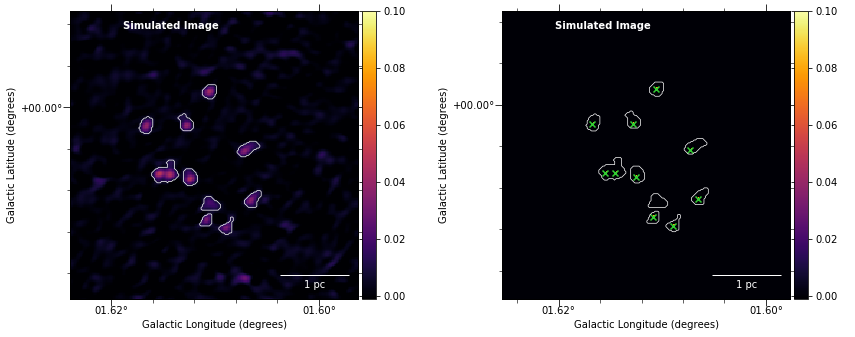

In [208]:
path = '/Users/hph/cmzoom_catalog/simobserve_1-11-19/'
make_simobs_panel(path,'final_noregrid_image_4-6-19_noisy0.fits','initial_temp_image_4-6-19_noisy0.fits',
                  'temp_mask_4-6-19_noisy0.fits','Simulated Image')
plt.show()

In [166]:
initial_hdu = fits.open(path+'initial_temp_image_4-6-19_noisy0.fits')[0]
final_hdu = fits.open(path+'final_noregrid_image_4-6-19_noisy0.fits')[0]
initial_data = initial_hdu.data
initial_hdu.header.remove('CRVAL3')
initial_hdu.header.remove('CRVAL4')
initial_hdu.header.remove('CTYPE3')
initial_hdu.header.remove('CTYPE4')
initial_hdu.header.remove('CDELT3')
initial_hdu.header.remove('CDELT4')
initial_hdu.header.remove('CUNIT3')
initial_hdu.header.remove('CUNIT4')
initial_hdu.header.remove('CRPIX3')
initial_hdu.header.remove('CRPIX4')
initial_hdu.header.remove('PC03_01')
initial_hdu.header.remove('PC03_02')
initial_hdu.header.remove('PC03_03')
initial_hdu.header.remove('PC03_04')
initial_hdu.header.remove('PC04_01')
initial_hdu.header.remove('PC04_02')
initial_hdu.header.remove('PC04_03')
initial_hdu.header.remove('PC04_04')
initial_hdu.header.remove('PC01_03')
initial_hdu.header.remove('PC01_04')
initial_hdu.header.remove('PC02_03')
initial_hdu.header.remove('PC02_04')

final_hdu.header.remove('CRVAL3')
final_hdu.header.remove('CRVAL4')
final_hdu.header.remove('CTYPE3')
final_hdu.header.remove('CTYPE4')
final_hdu.header.remove('CDELT3')
final_hdu.header.remove('CDELT4')
final_hdu.header.remove('CUNIT3')
final_hdu.header.remove('CUNIT4')
final_hdu.header.remove('CRPIX3')
final_hdu.header.remove('CRPIX4')
final_hdu.header.remove('PC3_1')
final_hdu.header.remove('PC3_2')
final_hdu.header.remove('PC3_3')
final_hdu.header.remove('PC3_4')
final_hdu.header.remove('PC4_1')
final_hdu.header.remove('PC4_2')
final_hdu.header.remove('PC4_3')
final_hdu.header.remove('PC4_4')
final_hdu.header.remove('PC1_3')
final_hdu.header.remove('PC1_4')
final_hdu.header.remove('PC2_3')
final_hdu.header.remove('PC2_4')
final_hdu.header.remove('NAXIS3')
final_hdu.header.remove('NAXIS4')
final_hdu.header['NAXIS']=2


final_wcs = wcs.WCS(final_hdu)

print final_hdu.header
print np.where(initial_data!=0)
initial_wcs = wcs.WCS(initial_hdu.header)
initial_wcs
init_cond = np.where(initial_data!=0)
print initial_wcs
wcs_init = initial_wcs.wcs_pix2world(init_cond[0],init_cond[1],1)
#print wcs_init
transformed_pix = initial_wcs.wcs_world2pix(wcs_init[0],wcs_init[1],1)

SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    2                                                  NAXIS1  =                  200                                                  NAXIS2  =                  200                                                  EXTEND  =                    T                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BMAJ    =   9.605898459752E-04                                                  BMIN    =   6.667590141296E-04                                                  BPA     =  -6.387192916870E+01                                                  BTYPE   = 'Intensity'                                                           OBJECT  = 'sim_compact.sma.cmzoom.compac

(200, 200)


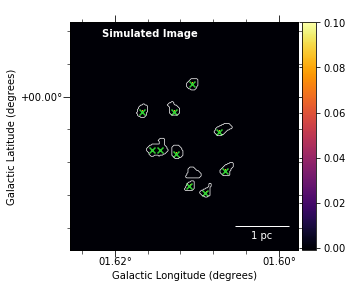

In [167]:
path = '/Users/hph/cmzoom_catalog/simobserve_1-11-19/'
make_simobs_panel(path,'initial_temp_image_4-6-19_noisy0.fits','temp_mask_4-6-19_noisy0.fits','Simulated Image')
plt.show()